#  **PART 1**

In [ ]:
import tensorflow.keras as keras
from keras import losses
from keras import metrics
from keras import optimizers
import tensorflow as tf
from keras import models
from keras import layers
from sklearn.model_selection import KFold
import numpy as np
tf.__version__
#Load Data
from keras.datasets import imdb



In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(len(train_data))
max([max(sequence) for sequence in train_data])

25000


9999

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

layers = [[1], [16, 4], [32, 16, 8, 4]]
lr = [0.1, 0.001, 0.00001]
num_words = 10000

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

fold_histories1 = []
model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores = []
training_scores = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=20, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories1.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores.append(train_score[1])
    validation_scores.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores)
avg_val_score = np.mean(validation_scores)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")


Epoch 1/20
19/19 [==============================] - 6s 204ms/step - loss: 0.6468 - accuracy: 0.6499 - val_loss: 0.5992 - val_accuracy: 0.7472
Epoch 2/20
19/19 [==============================] - 1s 70ms/step - loss: 0.5716 - accuracy: 0.7559 - val_loss: 0.5616 - val_accuracy: 0.7563
Epoch 3/20
19/19 [==============================] - 1s 64ms/step - loss: 0.5344 - accuracy: 0.8005 - val_loss: 0.5409 - val_accuracy: 0.7598
Epoch 4/20
19/19 [==============================] - 1s 77ms/step - loss: 0.5075 - accuracy: 0.8292 - val_loss: 0.5226 - val_accuracy: 0.7888
Epoch 5/20
19/19 [==============================] - 3s 188ms/step - loss: 0.4866 - accuracy: 0.8502 - val_loss: 0.5104 - val_accuracy: 0.8008
Epoch 6/20
19/19 [==============================] - 3s 153ms/step - loss: 0.4693 - accuracy: 0.8674 - val_loss: 0.4953 - val_accuracy: 0.8402
Epoch 7/20
19/19 [==============================] - 2s 94ms/step - loss: 0.4543 - accuracy: 0.8825 - val_loss: 0.4855 - val_accuracy: 0.8530
Epoch 8/20

In [ ]:
import numpy as np
metric_keys = fold_histories1[0].history.keys()
average_history1 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories1[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories1])
        average_history1[key].append(avg)



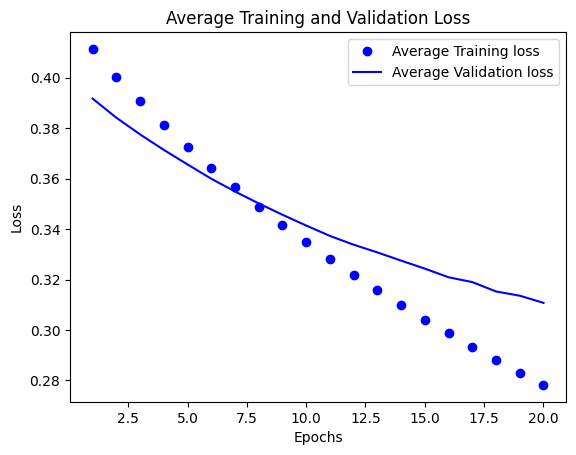

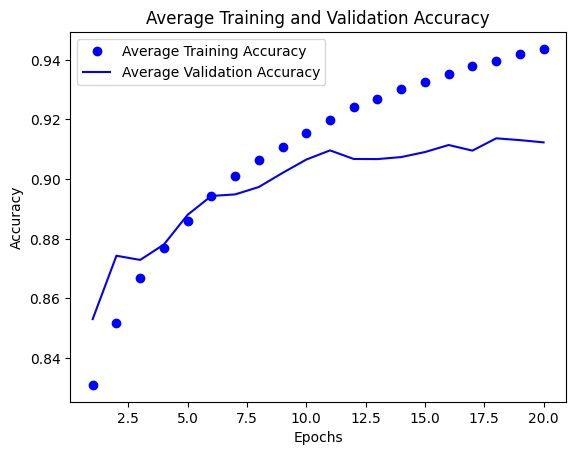

In [ ]:
import matplotlib.pyplot as plt


avg_acc = average_history1['accuracy']
avg_val_acc = average_history1['val_accuracy']
avg_loss = average_history1['loss']
avg_val_loss = average_history1['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

fold_histories2 = []
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores2 = []
training_scores2 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=20, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories2.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores2.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores2.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores2)
avg_val_score = np.mean(validation_scores2)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
19/19 [==============================] - 3s 129ms/step - loss: 0.6264 - accuracy: 0.6991 - val_loss: 0.5602 - val_accuracy: 0.7168
Epoch 2/20
19/19 [==============================] - 2s 81ms/step - loss: 0.4903 - accuracy: 0.8419 - val_loss: 0.4696 - val_accuracy: 0.8616
Epoch 3/20
19/19 [==============================] - 1s 74ms/step - loss: 0.3981 - accuracy: 0.8858 - val_loss: 0.4047 - val_accuracy: 0.8485
Epoch 4/20
19/19 [==============================] - 2s 96ms/step - loss: 0.3278 - accuracy: 0.9081 - val_loss: 0.3415 - val_accuracy: 0.8845
Epoch 5/20
19/19 [==============================] - 3s 150ms/step - loss: 0.2773 - accuracy: 0.9223 - val_loss: 0.3262 - val_accuracy: 0.8765
Epoch 6/20
19/19 [==============================] - 2s 116ms/step - loss: 0.2408 - accuracy: 0.9306 - val_loss: 0.2922 - val_accuracy: 0.8930
Epoch 7/20
19/19 [==============================] - 3s 141ms/step - loss: 0.2157 - accuracy: 0.9353 - val_loss: 0.2862 - val_accuracy: 0.8885
Epoch 8/2

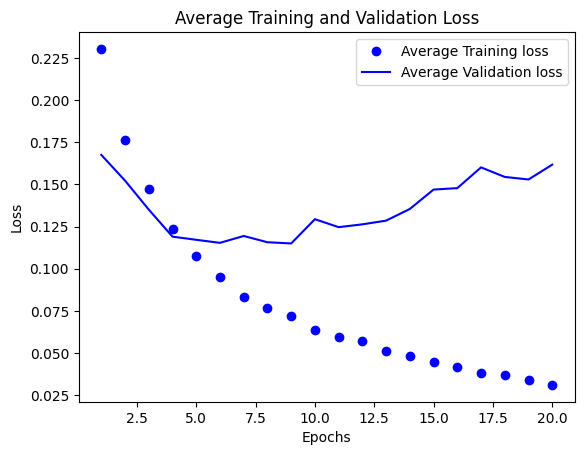

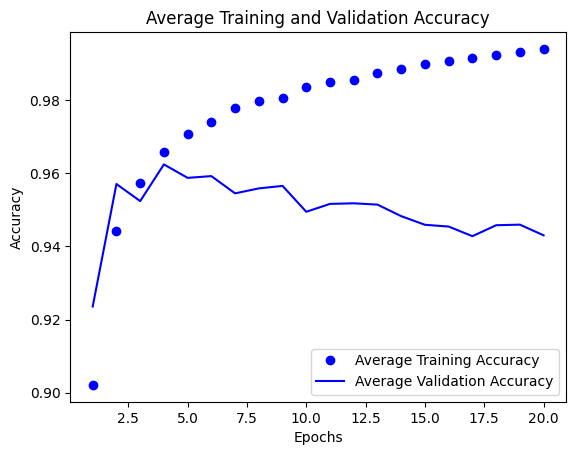

In [ ]:
import numpy as np
metric_keys = fold_histories2[0].history.keys()
average_history2 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories2[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories2])
        average_history2[key].append(avg)




avg_acc = average_history2['accuracy']
avg_val_acc = average_history2['val_accuracy']
avg_loss = average_history2['loss']
avg_val_loss = average_history2['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

fold_histories3 = []
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores3 = []
training_scores3 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=20, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories3.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores3.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores3.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores3)
avg_val_score = np.mean(validation_scores3)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
19/19 [==============================] - 6s 214ms/step - loss: 0.6681 - accuracy: 0.6326 - val_loss: 0.6268 - val_accuracy: 0.7946
Epoch 2/20
19/19 [==============================] - 2s 92ms/step - loss: 0.5881 - accuracy: 0.7411 - val_loss: 0.5632 - val_accuracy: 0.7077
Epoch 3/20
19/19 [==============================] - 2s 89ms/step - loss: 0.5265 - accuracy: 0.8108 - val_loss: 0.5135 - val_accuracy: 0.8590
Epoch 4/20
19/19 [==============================] - 2s 91ms/step - loss: 0.4835 - accuracy: 0.8587 - val_loss: 0.4948 - val_accuracy: 0.8830
Epoch 5/20
19/19 [==============================] - 2s 123ms/step - loss: 0.4542 - accuracy: 0.8862 - val_loss: 0.4917 - val_accuracy: 0.8405
Epoch 6/20
19/19 [==============================] - 2s 105ms/step - loss: 0.4354 - accuracy: 0.8978 - val_loss: 0.4644 - val_accuracy: 0.8832
Epoch 7/20
19/19 [==============================] - 2s 93ms/step - loss: 0.4111 - accuracy: 0.9179 - val_loss: 0.4608 - val_accuracy: 0.8883
Epoch 8/20

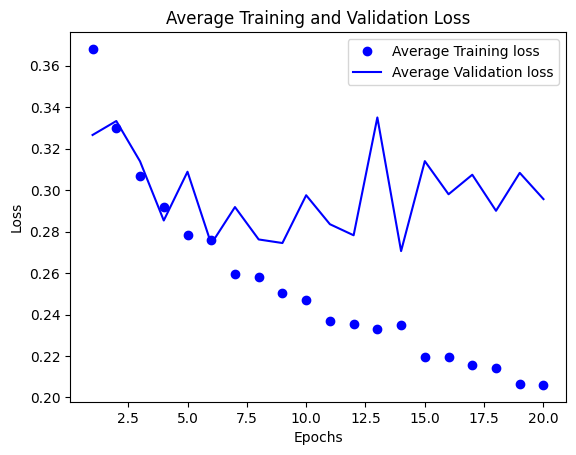

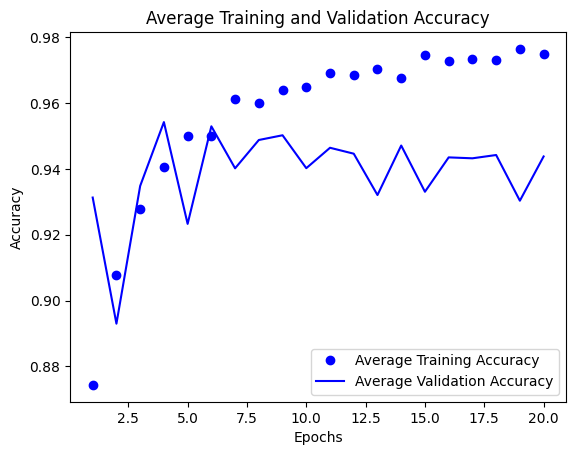

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
metric_keys = fold_histories3[0].history.keys()
average_history3 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories3[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories3])
        average_history3[key].append(avg)




avg_acc = average_history3['accuracy']
avg_val_acc = average_history3['val_accuracy']
avg_loss = average_history3['loss']
avg_val_loss = average_history3['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

fold_histories4 = []
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores4 = []
training_scores4 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=4, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories4.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores4.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores4.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores4)
avg_val_score = np.mean(validation_scores4)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/4
19/19 [==============================] - 5s 225ms/step - loss: 0.5974 - accuracy: 0.7318 - val_loss: 0.5079 - val_accuracy: 0.7923
Epoch 2/4
19/19 [==============================] - 2s 81ms/step - loss: 0.4402 - accuracy: 0.8677 - val_loss: 0.4134 - val_accuracy: 0.8491
Epoch 3/4
19/19 [==============================] - 1s 78ms/step - loss: 0.3550 - accuracy: 0.8943 - val_loss: 0.3496 - val_accuracy: 0.8822
Epoch 4/4
19/19 [==============================] - 1s 78ms/step - loss: 0.2971 - accuracy: 0.9117 - val_loss: 0.3240 - val_accuracy: 0.8758
Epoch 1/4
19/19 [==============================] - 2s 101ms/step - loss: 0.2778 - accuracy: 0.9069 - val_loss: 0.2504 - val_accuracy: 0.9200
Epoch 2/4
19/19 [==============================] - 1s 73ms/step - loss: 0.2466 - accuracy: 0.9169 - val_loss: 0.2398 - val_accuracy: 0.9194
Epoch 3/4
19/19 [==============================] - 2s 81ms/step - loss: 0.2220 - accuracy: 0.9258 - val_loss: 0.2369 - val_accuracy: 0.9146
Epoch 4/4
19/19 [=

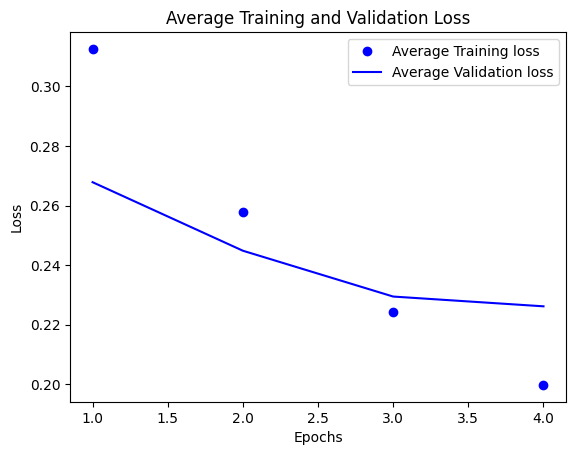

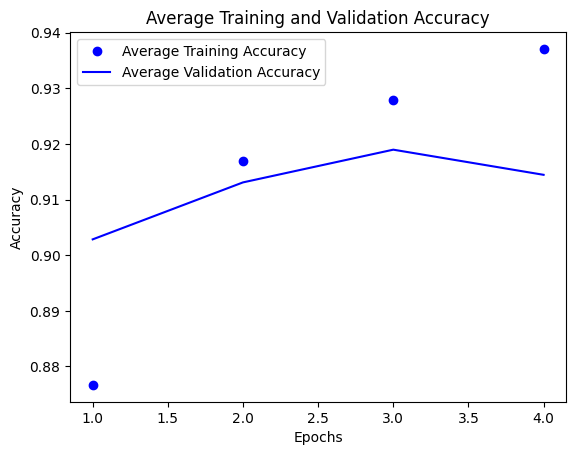

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories4[0].history.keys()
average_history4 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories4[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories4])
        average_history4[key].append(avg)




avg_acc = average_history4['accuracy']
avg_val_acc = average_history4['val_accuracy']
avg_loss = average_history4['loss']
avg_val_loss = average_history4['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

fold_histories5 = []
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores5 = []
training_scores5 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=4, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories5.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores5.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores5.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores5)
avg_val_score = np.mean(validation_scores5)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/4
19/19 [==============================] - 7s 217ms/step - loss: 0.6282 - accuracy: 0.6707 - val_loss: 0.5515 - val_accuracy: 0.7934
Epoch 2/4
19/19 [==============================] - 2s 85ms/step - loss: 0.5185 - accuracy: 0.8091 - val_loss: 0.5115 - val_accuracy: 0.7768
Epoch 3/4
19/19 [==============================] - 2s 124ms/step - loss: 0.4722 - accuracy: 0.8585 - val_loss: 0.4809 - val_accuracy: 0.8538
Epoch 4/4
19/19 [==============================] - 4s 225ms/step - loss: 0.4484 - accuracy: 0.8838 - val_loss: 0.4798 - val_accuracy: 0.8312
Epoch 1/4
19/19 [==============================] - 3s 164ms/step - loss: 0.4386 - accuracy: 0.8919 - val_loss: 0.4432 - val_accuracy: 0.9314
Epoch 2/4
19/19 [==============================] - 2s 82ms/step - loss: 0.4194 - accuracy: 0.9104 - val_loss: 0.4180 - val_accuracy: 0.9045
Epoch 3/4
19/19 [==============================] - 2s 85ms/step - loss: 0.4021 - accuracy: 0.9191 - val_loss: 0.4190 - val_accuracy: 0.8994
Epoch 4/4
19/19 

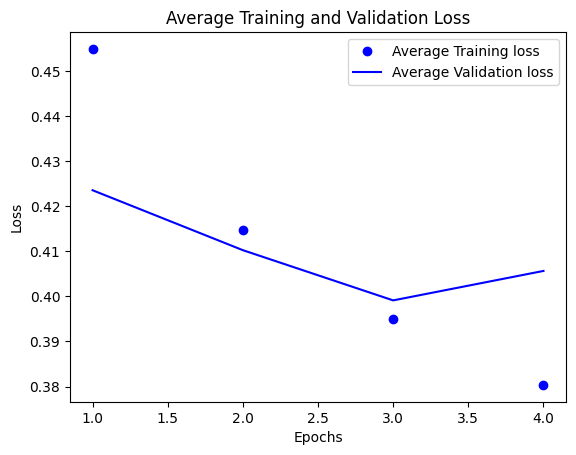

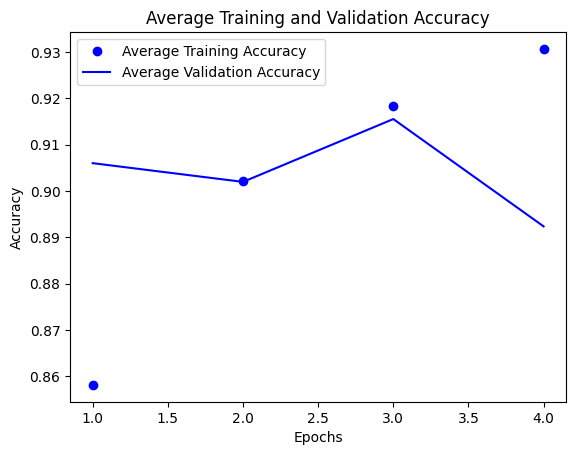

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories5[0].history.keys()
average_history5 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories5[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories5])
        average_history5[key].append(avg)




avg_acc = average_history5['accuracy']
avg_val_acc = average_history5['val_accuracy']
avg_loss = average_history5['loss']
avg_val_loss = average_history5['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

fold_histories6 = []
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores6 = []
training_scores6 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=4, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories6.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores6.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores6.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores6)
avg_val_score = np.mean(validation_scores6)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/4
19/19 [==============================] - 4s 153ms/step - loss: 0.5531 - accuracy: 0.7230 - val_loss: 0.4178 - val_accuracy: 0.8350
Epoch 2/4
19/19 [==============================] - 2s 84ms/step - loss: 0.3472 - accuracy: 0.8818 - val_loss: 0.3320 - val_accuracy: 0.8813
Epoch 3/4
19/19 [==============================] - 2s 118ms/step - loss: 0.2761 - accuracy: 0.9065 - val_loss: 0.3025 - val_accuracy: 0.8896
Epoch 4/4
19/19 [==============================] - 2s 98ms/step - loss: 0.2311 - accuracy: 0.9247 - val_loss: 0.2831 - val_accuracy: 0.8923
Epoch 1/4
19/19 [==============================] - 4s 192ms/step - loss: 0.2305 - accuracy: 0.9186 - val_loss: 0.1934 - val_accuracy: 0.9390
Epoch 2/4
19/19 [==============================] - 2s 121ms/step - loss: 0.2030 - accuracy: 0.9283 - val_loss: 0.1998 - val_accuracy: 0.9317
Epoch 3/4
19/19 [==============================] - 2s 115ms/step - loss: 0.1758 - accuracy: 0.9419 - val_loss: 0.1984 - val_accuracy: 0.9296
Epoch 4/4
19/19

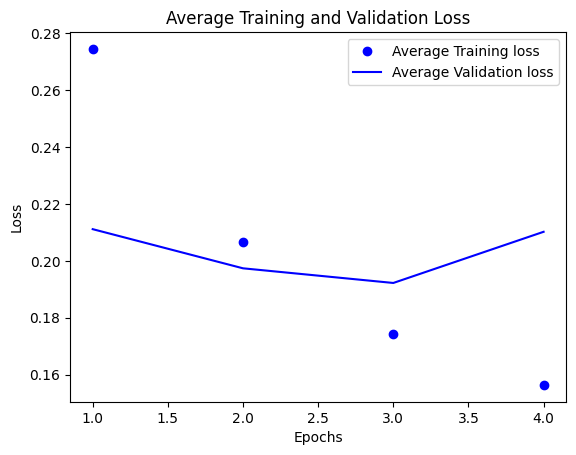

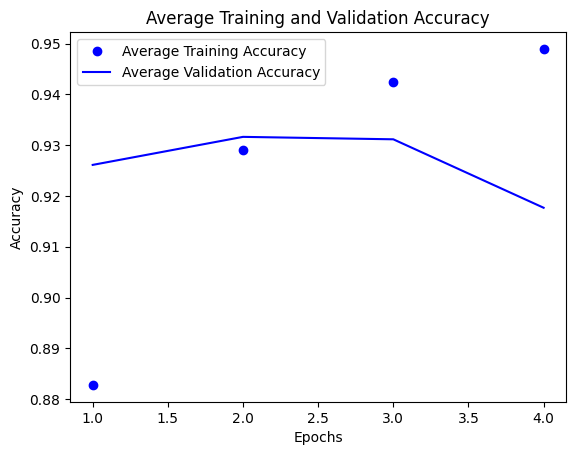

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories6[0].history.keys()
average_history6 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories6[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories6])
        average_history6[key].append(avg)




avg_acc = average_history6['accuracy']
avg_val_acc = average_history6['val_accuracy']
avg_loss = average_history6['loss']
avg_val_loss = average_history6['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 1000
fold_histories7 = []
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores7 = []
training_scores7 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold, epochs=4, batch_size=1024, validation_data=(X_val_fold, Y_val_fold))
    fold_histories7.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    training_scores7.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores7.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores7)
avg_val_score = np.mean(validation_scores7)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/4
19/19 [==============================] - 1s 28ms/step - loss: 0.6776 - accuracy: 0.5484 - val_loss: 0.6513 - val_accuracy: 0.6054
Epoch 2/4
19/19 [==============================] - 0s 15ms/step - loss: 0.6311 - accuracy: 0.6612 - val_loss: 0.6136 - val_accuracy: 0.6674
Epoch 3/4
19/19 [==============================] - 0s 13ms/step - loss: 0.5941 - accuracy: 0.7307 - val_loss: 0.5860 - val_accuracy: 0.6962
Epoch 4/4
19/19 [==============================] - 0s 12ms/step - loss: 0.5657 - accuracy: 0.7692 - val_loss: 0.5574 - val_accuracy: 0.7774
Epoch 1/4
19/19 [==============================] - 1s 28ms/step - loss: 0.5458 - accuracy: 0.7963 - val_loss: 0.5351 - val_accuracy: 0.8357
Epoch 2/4
19/19 [==============================] - 0s 19ms/step - loss: 0.5261 - accuracy: 0.8185 - val_loss: 0.5212 - val_accuracy: 0.7877
Epoch 3/4
19/19 [==============================] - 0s 18ms/step - loss: 0.5101 - accuracy: 0.8330 - val_loss: 0.5054 - val_accuracy: 0.8214
Epoch 4/4
19/19 [===

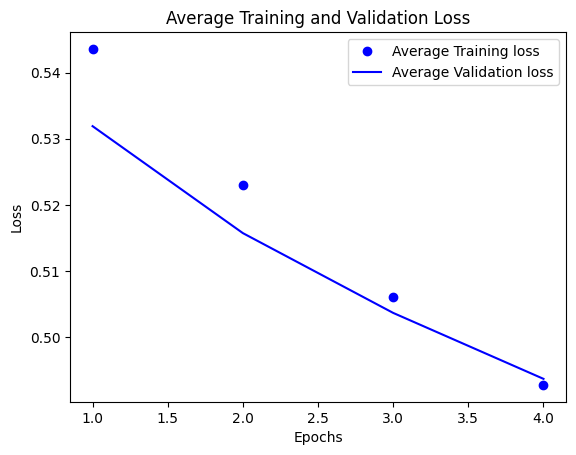

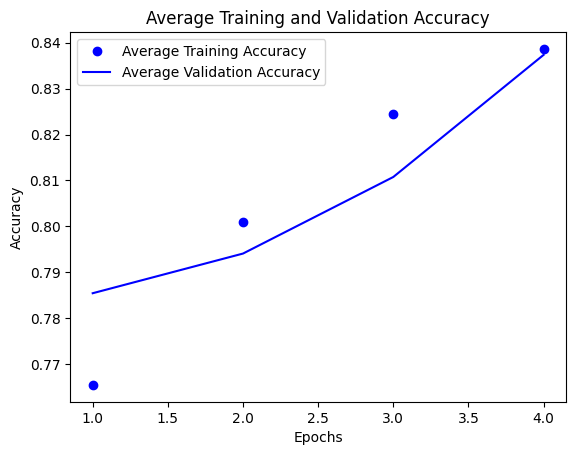

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories7[0].history.keys()
average_history7 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories7[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories7])
        average_history7[key].append(avg)




avg_acc = average_history7['accuracy']
avg_val_acc = average_history7['val_accuracy']
avg_loss = average_history7['loss']
avg_val_loss = average_history7['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.5332 - accuracy: 0.7656
Epoch 2/4
49/49 [==============================] - 2s 41ms/step - loss: 0.3044 - accuracy: 0.8916
Epoch 3/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2298 - accuracy: 0.9148
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.2898 - accuracy: 0.8846


In [ ]:
gc.collect()
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 41ms/step - loss: 0.5099 - accuracy: 0.7928
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.3203 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2470 - accuracy: 0.9195
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2850 - accuracy: 0.8870


In [ ]:
gc.collect()
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
gc.collect()

Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.5023 - accuracy: 0.8070
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.3121 - accuracy: 0.8940
Epoch 3/4
49/49 [==============================] - 2s 39ms/step - loss: 0.2456 - accuracy: 0.9120
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2815 - accuracy: 0.8875


1358

# **Part 2**

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[10]

3

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories8 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores8 = []
training_scores8 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Convert labels to one-hot encoding
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    # Assuming 'model' is already defined and compiled
    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=20, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories8.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores8.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores8.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores8)
avg_val_score = np.mean(validation_scores8)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
14/14 [==============================] - 5s 251ms/step - loss: 3.4535 - accuracy: 0.0028 - val_loss: 3.0387 - val_accuracy: 0.0000e+00
Epoch 2/20
14/14 [==============================] - 1s 61ms/step - loss: 2.7003 - accuracy: 0.0321 - val_loss: 2.2789 - val_accuracy: 0.1630
Epoch 3/20
14/14 [==============================] - 1s 61ms/step - loss: 1.9087 - accuracy: 0.4132 - val_loss: 1.5473 - val_accuracy: 0.4938
Epoch 4/20
14/14 [==============================] - 1s 60ms/step - loss: 1.2667 - accuracy: 0.5705 - val_loss: 1.0928 - val_accuracy: 0.4951
Epoch 5/20
14/14 [==============================] - 1s 60ms/step - loss: 0.9151 - accuracy: 0.6437 - val_loss: 0.9014 - val_accuracy: 0.4911
Epoch 6/20
14/14 [==============================] - 1s 55ms/step - loss: 0.7565 - accuracy: 0.6835 - val_loss: 0.8162 - val_accuracy: 0.4991
Epoch 7/20
14/14 [==============================] - 1s 57ms/step - loss: 0.6724 - accuracy: 0.7084 - val_loss: 0.8033 - val_accuracy: 0.4951
Epoch 8/

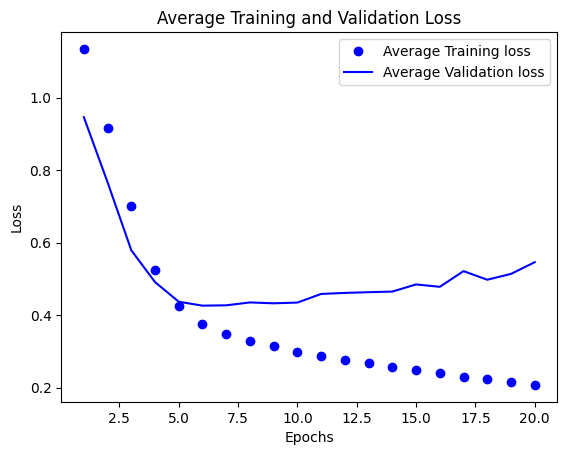

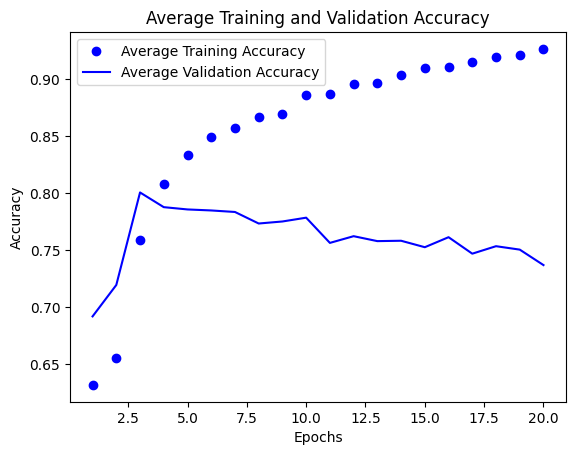

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories8[0].history.keys()
average_history8 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories8[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories8])
        average_history8[key].append(avg)




avg_acc = average_history8['accuracy']
avg_val_acc = average_history8['val_accuracy']
avg_loss = average_history8['loss']
avg_val_loss = average_history8['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories9 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores9 = []
training_scores9 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=20, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories9.append(history)
    # Evaluate the model on training and validation sets
    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores9.append(train_score[1])  # Assuming that 1 is the index for accuracy
    validation_scores9.append(val_score[1])
    gc.collect()

# Calculate the average scores across all folds
avg_train_score = np.mean(training_scores9)
avg_val_score = np.mean(validation_scores9)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
14/14 [==============================] - 2s 97ms/step - loss: 2.2643 - accuracy: 0.4532 - val_loss: 1.0709 - val_accuracy: 0.4991
Epoch 2/20
14/14 [==============================] - 1s 59ms/step - loss: 0.8877 - accuracy: 0.5333 - val_loss: 0.7772 - val_accuracy: 0.4955
Epoch 3/20
14/14 [==============================] - 1s 79ms/step - loss: 0.7353 - accuracy: 0.5465 - val_loss: 0.7272 - val_accuracy: 0.5147
Epoch 4/20
14/14 [==============================] - 1s 102ms/step - loss: 0.6812 - accuracy: 0.6292 - val_loss: 0.7141 - val_accuracy: 0.5053
Epoch 5/20
14/14 [==============================] - 1s 78ms/step - loss: 0.6398 - accuracy: 0.6725 - val_loss: 0.7323 - val_accuracy: 0.5120
Epoch 6/20
14/14 [==============================] - 1s 105ms/step - loss: 0.6187 - accuracy: 0.6594 - val_loss: 0.7357 - val_accuracy: 0.4960
Epoch 7/20
14/14 [==============================] - 2s 124ms/step - loss: 0.6009 - accuracy: 0.6633 - val_loss: 0.8286 - val_accuracy: 0.5071
Epoch 8/20

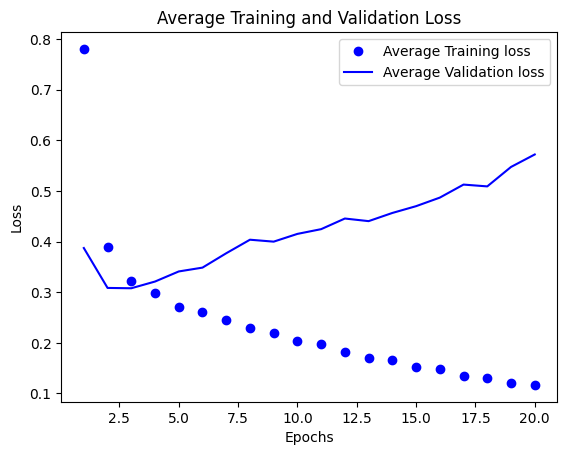

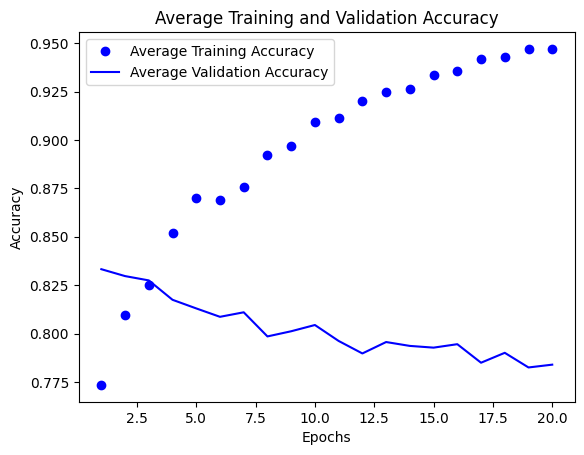

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories9[0].history.keys()
average_history9 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories9[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories9])
        average_history9[key].append(avg)




avg_acc = average_history9['accuracy']
avg_val_acc = average_history9['val_accuracy']
avg_loss = average_history9['loss']
avg_val_loss = average_history9['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories10 = []
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores10 = []
training_scores10 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=20, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories10.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores10.append(train_score[1])
    validation_scores10.append(val_score[1])
    gc.collect()


avg_train_score = np.mean(training_scores10)
avg_val_score = np.mean(validation_scores10)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
14/14 [==============================] - 4s 202ms/step - loss: 1.8941 - accuracy: 0.4667 - val_loss: 0.9046 - val_accuracy: 0.5062
Epoch 2/20
14/14 [==============================] - 3s 197ms/step - loss: 0.7981 - accuracy: 0.5355 - val_loss: 0.7490 - val_accuracy: 0.5098
Epoch 3/20
14/14 [==============================] - 1s 105ms/step - loss: 0.7010 - accuracy: 0.5888 - val_loss: 0.7311 - val_accuracy: 0.5027
Epoch 4/20
14/14 [==============================] - 3s 203ms/step - loss: 0.6648 - accuracy: 0.5781 - val_loss: 0.7504 - val_accuracy: 0.5013
Epoch 5/20
14/14 [==============================] - 3s 190ms/step - loss: 0.6293 - accuracy: 0.6434 - val_loss: 0.7820 - val_accuracy: 0.5004
Epoch 6/20
14/14 [==============================] - 2s 113ms/step - loss: 0.6186 - accuracy: 0.6198 - val_loss: 0.7352 - val_accuracy: 0.4969
Epoch 7/20
14/14 [==============================] - 2s 157ms/step - loss: 0.5574 - accuracy: 0.7170 - val_loss: 0.8021 - val_accuracy: 0.5071
Epoch 

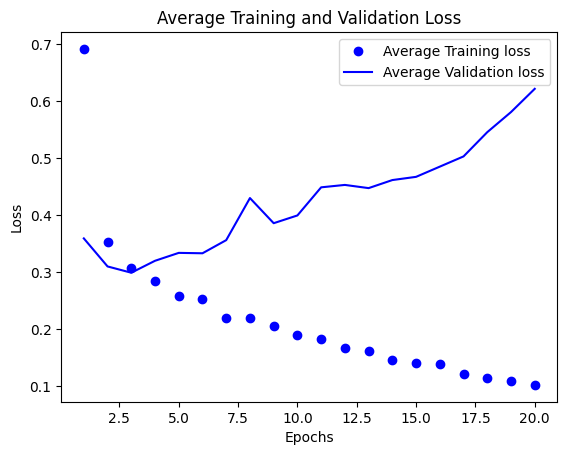

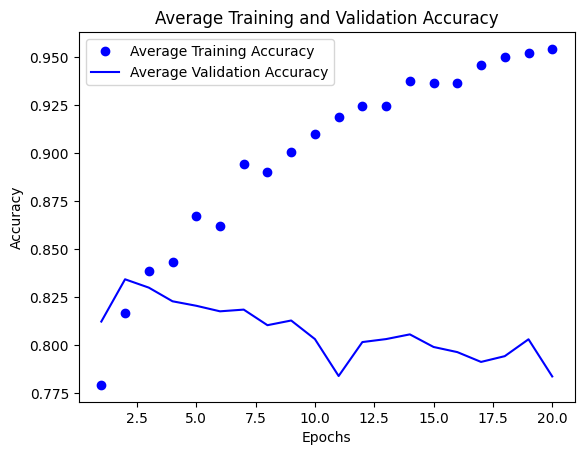

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories10[0].history.keys()
average_history10 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories10[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories10])
        average_history10[key].append(avg)




avg_acc = average_history10['accuracy']
avg_val_acc = average_history10['val_accuracy']
avg_loss = average_history10['loss']
avg_val_loss = average_history10['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories11 = []
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores11 = []
training_scores11 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=20, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories11.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores11.append(train_score[1])
    validation_scores11.append(val_score[1])
    gc.collect()

avg_train_score = np.mean(training_scores11)
avg_val_score = np.mean(validation_scores11)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
14/14 [==============================] - 2s 117ms/step - loss: 1.8958 - accuracy: 0.4669 - val_loss: 1.0461 - val_accuracy: 0.5058
Epoch 2/20
14/14 [==============================] - 2s 125ms/step - loss: 0.8600 - accuracy: 0.6032 - val_loss: 0.8205 - val_accuracy: 0.5009
Epoch 3/20
14/14 [==============================] - 2s 119ms/step - loss: 0.6971 - accuracy: 0.6532 - val_loss: 0.7554 - val_accuracy: 0.5120
Epoch 4/20
14/14 [==============================] - 1s 74ms/step - loss: 0.6364 - accuracy: 0.6691 - val_loss: 0.7406 - val_accuracy: 0.5058
Epoch 5/20
14/14 [==============================] - 1s 87ms/step - loss: 0.5776 - accuracy: 0.7322 - val_loss: 0.7411 - val_accuracy: 0.5067
Epoch 6/20
14/14 [==============================] - 1s 96ms/step - loss: 0.5436 - accuracy: 0.7528 - val_loss: 0.7606 - val_accuracy: 0.5018
Epoch 7/20
14/14 [==============================] - 1s 84ms/step - loss: 0.5056 - accuracy: 0.7887 - val_loss: 0.9029 - val_accuracy: 0.5022
Epoch 8/20

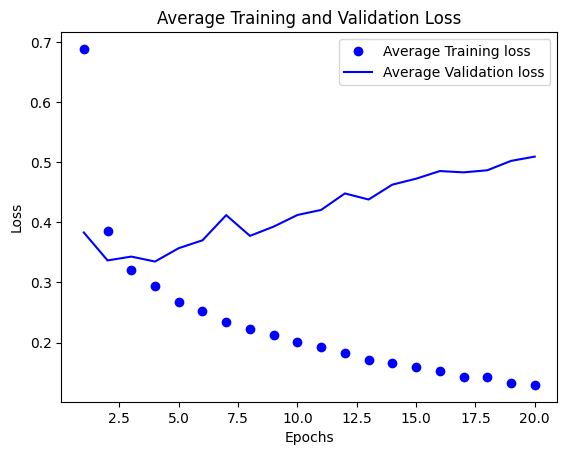

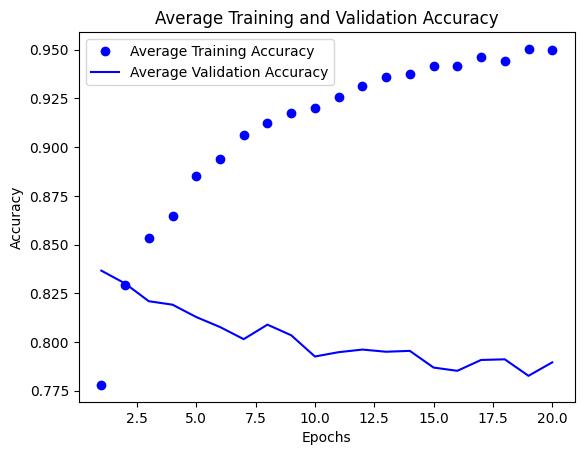

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories11[0].history.keys()
average_history11 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories11[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories11])
        average_history11[key].append(avg)




avg_acc = average_history11['accuracy']
avg_val_acc = average_history11['val_accuracy']
avg_loss = average_history11['loss']
avg_val_loss = average_history11['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories12 = []
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores12 = []
training_scores12 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=20, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories12.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores12.append(train_score[1])
    validation_scores12.append(val_score[1])
    gc.collect()

avg_train_score = np.mean(training_scores12)
avg_val_score = np.mean(validation_scores12)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/20
14/14 [==============================] - 2s 94ms/step - loss: 3.6790 - accuracy: 0.0123 - val_loss: 3.5520 - val_accuracy: 8.9047e-04
Epoch 2/20
14/14 [==============================] - 1s 47ms/step - loss: 3.4645 - accuracy: 0.0745 - val_loss: 3.3611 - val_accuracy: 0.3936
Epoch 3/20
14/14 [==============================] - 1s 49ms/step - loss: 3.2608 - accuracy: 0.4863 - val_loss: 3.1484 - val_accuracy: 0.5062
Epoch 4/20
14/14 [==============================] - 1s 47ms/step - loss: 3.0363 - accuracy: 0.5048 - val_loss: 2.9224 - val_accuracy: 0.5062
Epoch 5/20
14/14 [==============================] - 1s 44ms/step - loss: 2.8019 - accuracy: 0.5048 - val_loss: 2.6943 - val_accuracy: 0.5062
Epoch 6/20
14/14 [==============================] - 1s 65ms/step - loss: 2.5734 - accuracy: 0.5048 - val_loss: 2.4810 - val_accuracy: 0.5062
Epoch 7/20
14/14 [==============================] - 1s 66ms/step - loss: 2.3636 - accuracy: 0.5048 - val_loss: 2.2877 - val_accuracy: 0.5062
Epoch 8/2

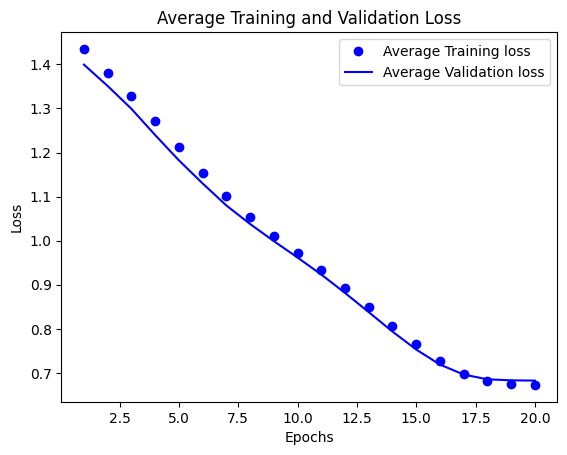

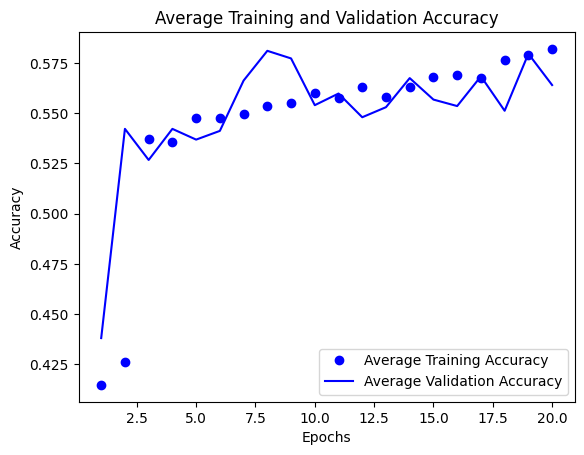

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories12[0].history.keys()
average_history12 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories12[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories12])
        average_history12[key].append(avg)




avg_acc = average_history12['accuracy']
avg_val_acc = average_history12['val_accuracy']
avg_loss = average_history12['loss']
avg_val_loss = average_history12['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories13 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores13 = []
training_scores13 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories13.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores13.append(train_score[1])
    validation_scores13.append(val_score[1])
    gc.collect()


avg_train_score = np.mean(training_scores13)
avg_val_score = np.mean(validation_scores13)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 3s 146ms/step - loss: 2.2013 - accuracy: 0.4681 - val_loss: 1.0263 - val_accuracy: 0.5098
Epoch 2/10
14/14 [==============================] - 1s 79ms/step - loss: 0.8681 - accuracy: 0.5439 - val_loss: 0.7944 - val_accuracy: 0.5053
Epoch 3/10
14/14 [==============================] - 1s 64ms/step - loss: 0.7355 - accuracy: 0.5382 - val_loss: 0.7319 - val_accuracy: 0.5018
Epoch 4/10
14/14 [==============================] - 1s 65ms/step - loss: 0.6796 - accuracy: 0.5935 - val_loss: 0.7168 - val_accuracy: 0.5107
Epoch 5/10
14/14 [==============================] - 1s 64ms/step - loss: 0.6512 - accuracy: 0.6348 - val_loss: 0.7162 - val_accuracy: 0.4964
Epoch 6/10
14/14 [==============================] - 1s 64ms/step - loss: 0.6110 - accuracy: 0.6777 - val_loss: 0.7196 - val_accuracy: 0.5045
Epoch 7/10
14/14 [==============================] - 1s 66ms/step - loss: 0.5837 - accuracy: 0.6921 - val_loss: 0.7503 - val_accuracy: 0.5058
Epoch 8/10
1

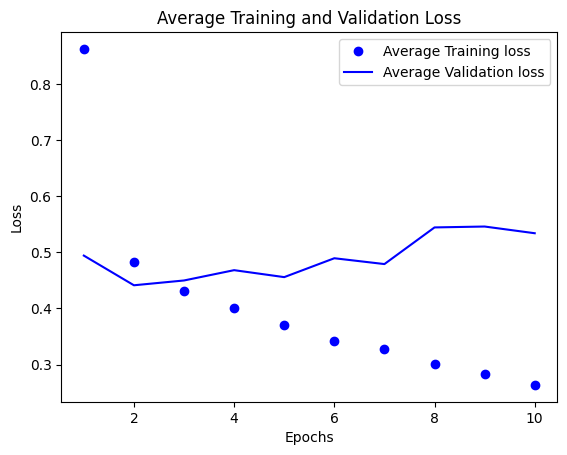

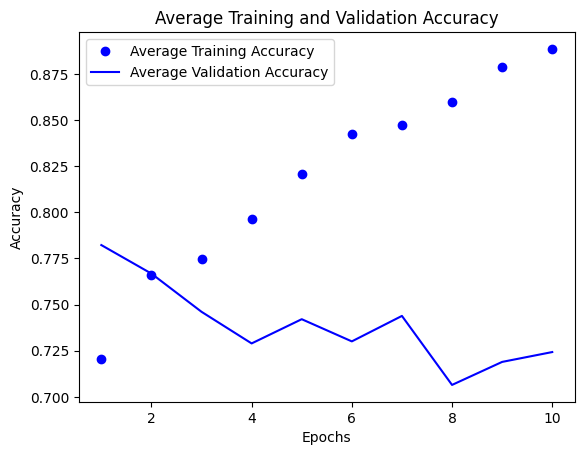

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories13[0].history.keys()
average_history13 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories13[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories13])
        average_history13[key].append(avg)




avg_acc = average_history13['accuracy']
avg_val_acc = average_history13['val_accuracy']
avg_loss = average_history13['loss']
avg_val_loss = average_history13['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories14 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores14 = []
training_scores14 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories14.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores14.append(train_score[1])
    validation_scores14.append(val_score[1])
    gc.collect()


avg_train_score = np.mean(training_scores14)
avg_val_score = np.mean(validation_scores14)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 3s 139ms/step - loss: 2.1249 - accuracy: 0.4684 - val_loss: 0.9822 - val_accuracy: 0.4880
Epoch 2/10
14/14 [==============================] - 1s 62ms/step - loss: 0.8415 - accuracy: 0.5647 - val_loss: 0.7858 - val_accuracy: 0.5049
Epoch 3/10
14/14 [==============================] - 1s 63ms/step - loss: 0.7144 - accuracy: 0.5603 - val_loss: 0.7299 - val_accuracy: 0.5022
Epoch 4/10
14/14 [==============================] - 1s 61ms/step - loss: 0.6576 - accuracy: 0.6303 - val_loss: 0.8137 - val_accuracy: 0.5053
Epoch 5/10
14/14 [==============================] - 1s 75ms/step - loss: 0.6387 - accuracy: 0.6312 - val_loss: 0.7247 - val_accuracy: 0.4982
Epoch 6/10
14/14 [==============================] - 1s 101ms/step - loss: 0.5975 - accuracy: 0.6827 - val_loss: 0.7305 - val_accuracy: 0.5062
Epoch 7/10
14/14 [==============================] - 1s 83ms/step - loss: 0.5602 - accuracy: 0.7176 - val_loss: 0.7778 - val_accuracy: 0.5040
Epoch 8/10


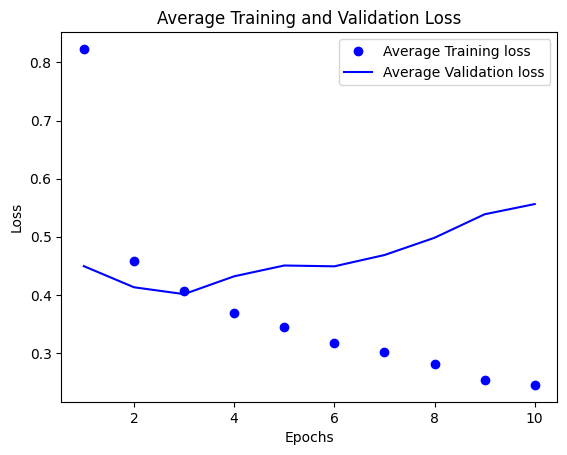

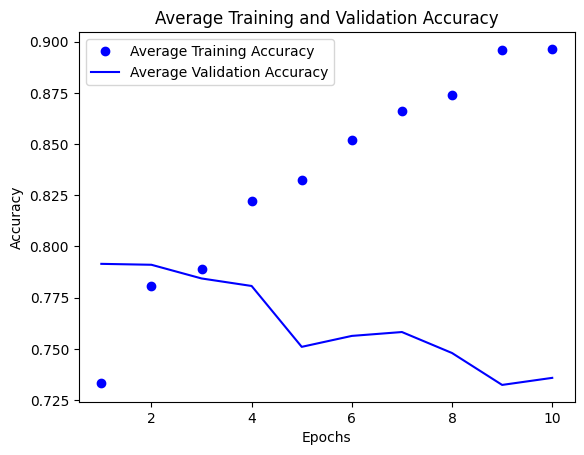

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories14[0].history.keys()
average_history14 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories14[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories14])
        average_history14[key].append(avg)




avg_acc = average_history14['accuracy']
avg_val_acc = average_history14['val_accuracy']
avg_loss = average_history14['loss']
avg_val_loss = average_history14['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories15 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores15 = []
training_scores15 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories15.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores15.append(train_score[1])
    validation_scores15.append(val_score[1])
    gc.collect()


avg_train_score = np.mean(training_scores15)
avg_val_score = np.mean(validation_scores15)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 3s 141ms/step - loss: 2.0534 - accuracy: 0.4581 - val_loss: 1.0132 - val_accuracy: 0.5013
Epoch 2/10
14/14 [==============================] - 1s 62ms/step - loss: 0.8512 - accuracy: 0.5330 - val_loss: 0.7754 - val_accuracy: 0.5102
Epoch 3/10
14/14 [==============================] - 1s 61ms/step - loss: 0.7159 - accuracy: 0.5895 - val_loss: 0.7342 - val_accuracy: 0.5134
Epoch 4/10
14/14 [==============================] - 1s 63ms/step - loss: 0.6794 - accuracy: 0.5843 - val_loss: 0.7153 - val_accuracy: 0.5076
Epoch 5/10
14/14 [==============================] - 1s 85ms/step - loss: 0.6453 - accuracy: 0.6406 - val_loss: 0.7143 - val_accuracy: 0.5165
Epoch 6/10
14/14 [==============================] - 2s 131ms/step - loss: 0.6231 - accuracy: 0.6529 - val_loss: 0.7229 - val_accuracy: 0.5098
Epoch 7/10
14/14 [==============================] - 2s 132ms/step - loss: 0.5922 - accuracy: 0.6908 - val_loss: 0.7937 - val_accuracy: 0.5071
Epoch 8/10

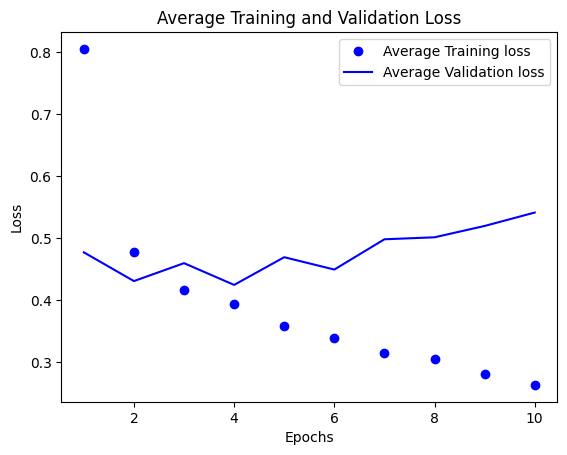

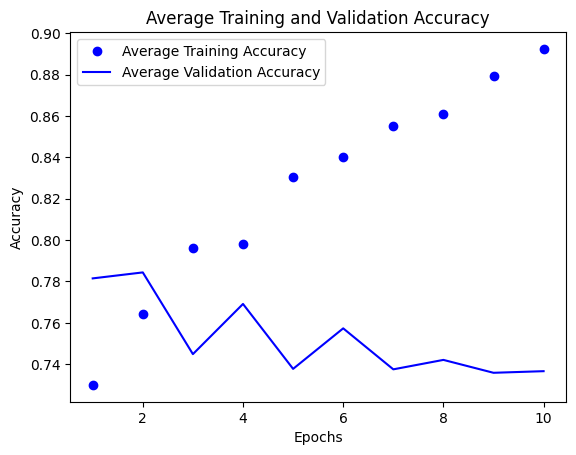

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories15[0].history.keys()
average_history15 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories15[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories15])
        average_history15[key].append(avg)




avg_acc = average_history15['accuracy']
avg_val_acc = average_history15['val_accuracy']
avg_loss = average_history15['loss']
avg_val_loss = average_history15['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories16 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores16 = []
training_scores16 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories16.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores16.append(train_score[1])
    validation_scores16.append(val_score[1])
    gc.collect()


avg_train_score = np.mean(training_scores16)
avg_val_score = np.mean(validation_scores16)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 2s 141ms/step - loss: 1.9580 - accuracy: 0.4718 - val_loss: 0.9455 - val_accuracy: 0.5062
Epoch 2/10
14/14 [==============================] - 1s 102ms/step - loss: 0.8173 - accuracy: 0.5352 - val_loss: 0.7778 - val_accuracy: 0.5031
Epoch 3/10
14/14 [==============================] - 1s 102ms/step - loss: 0.7108 - accuracy: 0.5555 - val_loss: 0.7230 - val_accuracy: 0.5142
Epoch 4/10
14/14 [==============================] - 1s 74ms/step - loss: 0.6597 - accuracy: 0.6058 - val_loss: 0.7501 - val_accuracy: 0.5031
Epoch 5/10
14/14 [==============================] - 1s 60ms/step - loss: 0.6372 - accuracy: 0.6146 - val_loss: 0.7350 - val_accuracy: 0.5000
Epoch 6/10
14/14 [==============================] - 2s 184ms/step - loss: 0.5900 - accuracy: 0.6878 - val_loss: 0.8343 - val_accuracy: 0.5085
Epoch 7/10
14/14 [==============================] - 2s 134ms/step - loss: 0.5708 - accuracy: 0.6998 - val_loss: 0.8443 - val_accuracy: 0.5031
Epoch 8/

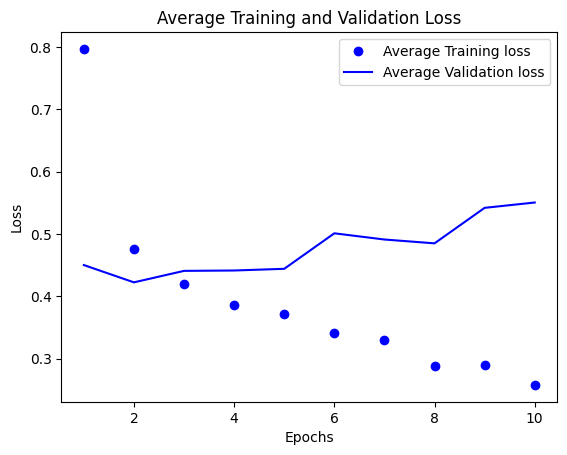

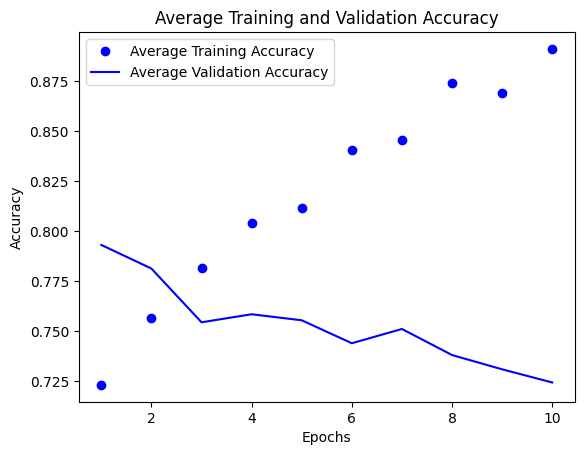

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories16[0].history.keys()
average_history16 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories16[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories16])
        average_history16[key].append(avg)




avg_acc = average_history16['accuracy']
avg_val_acc = average_history16['val_accuracy']
avg_loss = average_history16['loss']
avg_val_loss = average_history16['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories17 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores17 = []
training_scores17 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories17.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores17.append(train_score[1])
    validation_scores17.append(val_score[1])
    gc.collect()

avg_train_score = np.mean(training_scores17)
avg_val_score = np.mean(validation_scores17)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 4s 183ms/step - loss: 3.0338 - accuracy: 0.4408 - val_loss: 1.9148 - val_accuracy: 0.5062
Epoch 2/10
14/14 [==============================] - 2s 128ms/step - loss: 1.3197 - accuracy: 0.5316 - val_loss: 0.8794 - val_accuracy: 0.4929
Epoch 3/10
14/14 [==============================] - 2s 128ms/step - loss: 0.7608 - accuracy: 0.6038 - val_loss: 0.7356 - val_accuracy: 0.5013
Epoch 4/10
14/14 [==============================] - 2s 134ms/step - loss: 0.6599 - accuracy: 0.6994 - val_loss: 0.7166 - val_accuracy: 0.4982
Epoch 5/10
14/14 [==============================] - 1s 102ms/step - loss: 0.6255 - accuracy: 0.6998 - val_loss: 0.7283 - val_accuracy: 0.5040
Epoch 6/10
14/14 [==============================] - 1s 63ms/step - loss: 0.5882 - accuracy: 0.7448 - val_loss: 0.7281 - val_accuracy: 0.5027
Epoch 7/10
14/14 [==============================] - 1s 57ms/step - loss: 0.5472 - accuracy: 0.7807 - val_loss: 0.7314 - val_accuracy: 0.4969
Epoch 8/

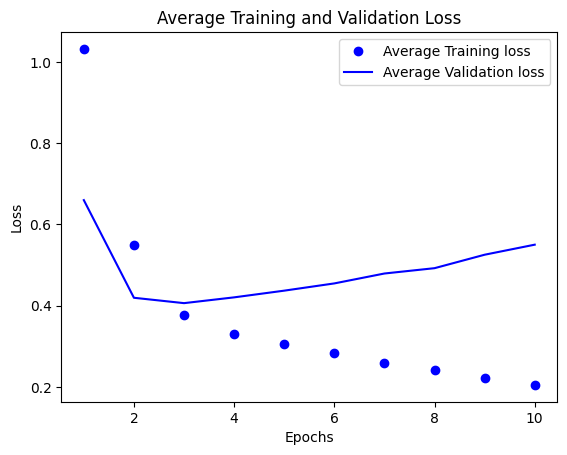

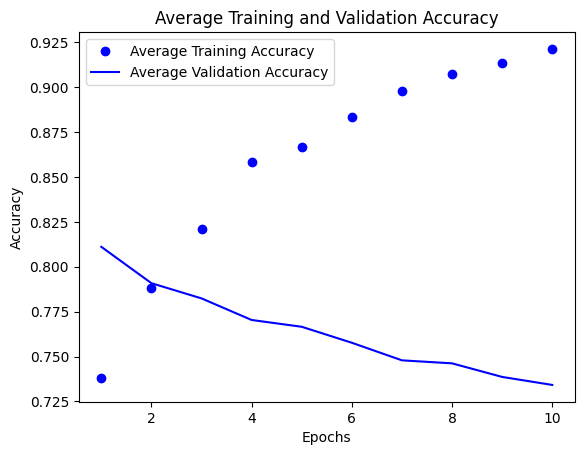

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories17[0].history.keys()
average_history17 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories17[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories17])
        average_history17[key].append(avg)




avg_acc = average_history17['accuracy']
avg_val_acc = average_history17['val_accuracy']
avg_loss = average_history17['loss']
avg_val_loss = average_history17['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories18 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores18 = []
training_scores18 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories18.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores18.append(train_score[1])
    validation_scores18.append(val_score[1])
    gc.collect()

avg_train_score = np.mean(training_scores18)
avg_val_score = np.mean(validation_scores18)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 3s 134ms/step - loss: 3.3964 - accuracy: 0.3158 - val_loss: 2.7541 - val_accuracy: 0.5076
Epoch 2/10
14/14 [==============================] - 1s 100ms/step - loss: 2.1739 - accuracy: 0.5310 - val_loss: 1.4997 - val_accuracy: 0.5062
Epoch 3/10
14/14 [==============================] - 2s 135ms/step - loss: 1.1577 - accuracy: 0.5279 - val_loss: 0.9020 - val_accuracy: 0.5147
Epoch 4/10
14/14 [==============================] - 2s 107ms/step - loss: 0.7993 - accuracy: 0.5963 - val_loss: 0.7690 - val_accuracy: 0.5147
Epoch 5/10
14/14 [==============================] - 1s 66ms/step - loss: 0.7053 - accuracy: 0.6569 - val_loss: 0.7336 - val_accuracy: 0.5076
Epoch 6/10
14/14 [==============================] - 1s 63ms/step - loss: 0.6673 - accuracy: 0.6918 - val_loss: 0.7232 - val_accuracy: 0.5125
Epoch 7/10
14/14 [==============================] - 1s 65ms/step - loss: 0.6419 - accuracy: 0.7216 - val_loss: 0.7187 - val_accuracy: 0.4982
Epoch 8/1

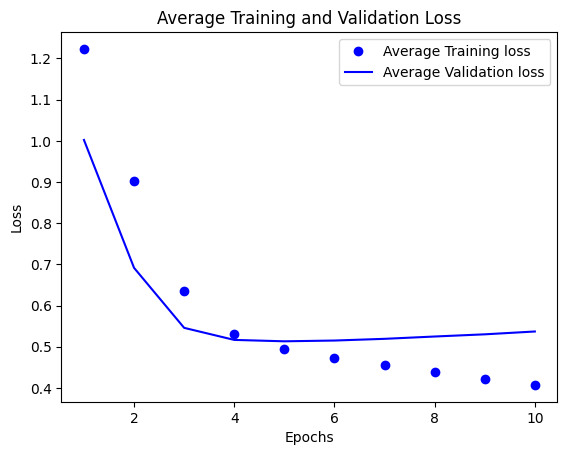

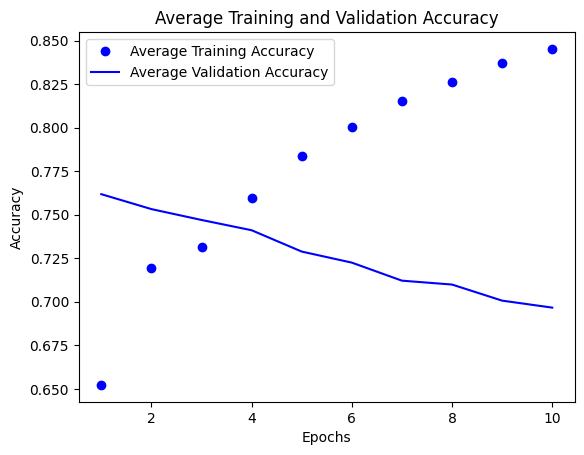

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories18[0].history.keys()
average_history18 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories18[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories18])
        average_history18[key].append(avg)




avg_acc = average_history18['accuracy']
avg_val_acc = average_history18['val_accuracy']
avg_loss = average_history18['loss']
avg_val_loss = average_history18['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras import models
from keras import layers
import gc

num_words = 10000
fold_histories19 = []
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cv = KFold(n_splits=4, random_state=4, shuffle=True)
validation_scores19 = []
training_scores19 = []

for train_index, val_index in cv.split(x_train):
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]
    Y_train_fold_one_hot = to_categorical(Y_train_fold, num_classes=46)
    Y_val_fold_one_hot = to_categorical(Y_val_fold, num_classes=46)

    history = model.fit(X_train_fold, Y_train_fold_one_hot, epochs=10, batch_size=512, validation_data=(X_val_fold, Y_val_fold_one_hot))
    fold_histories19.append(history)

    train_score = model.evaluate(X_train_fold, Y_train_fold_one_hot, verbose=0)
    val_score = model.evaluate(X_val_fold, Y_val_fold_one_hot, verbose=0)

    training_scores19.append(train_score[1])
    validation_scores19.append(val_score[1])
    gc.collect()

avg_train_score = np.mean(training_scores19)
avg_val_score = np.mean(validation_scores19)
gc.collect()

print(f"Average Training Score: {avg_train_score}")
print(f"Average Validation Score: {avg_val_score}")

Epoch 1/10
14/14 [==============================] - 3s 150ms/step - loss: 2.1816 - accuracy: 0.4280 - val_loss: 0.9003 - val_accuracy: 0.4915
Epoch 2/10
14/14 [==============================] - 2s 138ms/step - loss: 0.8210 - accuracy: 0.5046 - val_loss: 0.7395 - val_accuracy: 0.5058
Epoch 3/10
14/14 [==============================] - 2s 111ms/step - loss: 0.7356 - accuracy: 0.5037 - val_loss: 0.7959 - val_accuracy: 0.4938
Epoch 4/10
14/14 [==============================] - 1s 60ms/step - loss: 0.7085 - accuracy: 0.5215 - val_loss: 0.7556 - val_accuracy: 0.5062
Epoch 5/10
14/14 [==============================] - 1s 55ms/step - loss: 0.6963 - accuracy: 0.5370 - val_loss: 0.7457 - val_accuracy: 0.4973
Epoch 6/10
14/14 [==============================] - 1s 60ms/step - loss: 0.6716 - accuracy: 0.5776 - val_loss: 0.7092 - val_accuracy: 0.5116
Epoch 7/10
14/14 [==============================] - 1s 61ms/step - loss: 0.6512 - accuracy: 0.6039 - val_loss: 0.8014 - val_accuracy: 0.5076
Epoch 8/10

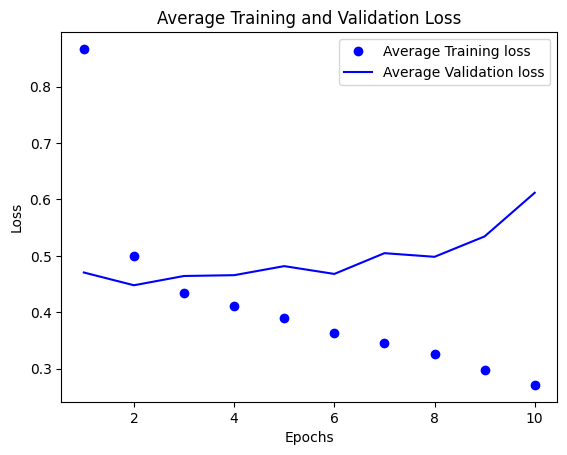

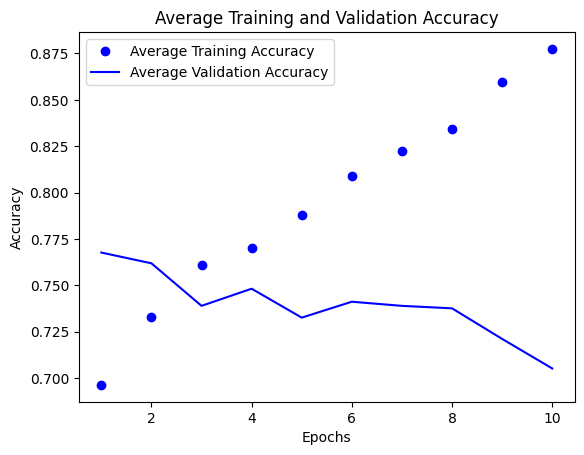

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metric_keys = fold_histories19[0].history.keys()
average_history19 = {key: [] for key in metric_keys}
for key in metric_keys:
    for epoch in range(len(fold_histories19[0].history[key])):
        avg = np.mean([fold_history.history[key][epoch] for fold_history in fold_histories19])
        average_history19[key].append(avg)




avg_acc = average_history19['accuracy']
avg_val_acc = average_history19['val_accuracy']
avg_loss = average_history19['loss']
avg_val_loss = average_history19['val_loss']

epochs = range(1, len(avg_acc) + 1)


plt.plot(epochs, avg_loss, 'bo', label='Average Training loss')  # "bo" is for "blue dot"
plt.plot(epochs, avg_val_loss, 'b', label='Average Validation loss')  # "b" is for "solid blue line"
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()  # New figure for accuracy
plt.plot(epochs, avg_acc, 'bo', label='Average Training Accuracy')
plt.plot(epochs, avg_val_acc, 'b', label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=10,
          batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
18/18 [==============================] - 3s 108ms/step - loss: 2.4937 - accuracy: 0.5346
Epoch 2/10
18/18 [==============================] - 1s 68ms/step - loss: 1.4281 - accuracy: 0.6899
Epoch 3/10
18/18 [==============================] - 2s 96ms/step - loss: 1.1262 - accuracy: 0.7567
Epoch 4/10
18/18 [==============================] - 1s 74ms/step - loss: 0.9311 - accuracy: 0.7990
Epoch 5/10
18/18 [==============================] - 1s 67ms/step - loss: 0.7743 - accuracy: 0.8339
Epoch 6/10
18/18 [==============================] - 1s 76ms/step - loss: 0.6493 - accuracy: 0.8566
Epoch 7/10
18/18 [==============================] - 1s 74ms/step - loss: 0.5456 - accuracy: 0.8835
Epoch 8/10
18/18 [==============================] - 1s 68ms/step - loss: 0.4607 - accuracy: 0.9012
Epoch 9/10
18/18 [==============================] - 1s 76ms/step - loss: 0.3927 - accuracy: 0.9148
Epoch 10/10
71/71 [==============================] - 1s 5ms/step - loss: 0.9377 - accuracy: 0.7894


In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=10,
          batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
18/18 [==============================] - 3s 104ms/step - loss: 2.2501 - accuracy: 0.5522
Epoch 2/10
18/18 [==============================] - 1s 73ms/step - loss: 1.2552 - accuracy: 0.7269
Epoch 3/10
18/18 [==============================] - 1s 73ms/step - loss: 0.9326 - accuracy: 0.7954
Epoch 4/10
18/18 [==============================] - 1s 73ms/step - loss: 0.7212 - accuracy: 0.8440
Epoch 5/10
18/18 [==============================] - 1s 71ms/step - loss: 0.5834 - accuracy: 0.8705
Epoch 6/10
18/18 [==============================] - 2s 97ms/step - loss: 0.4595 - accuracy: 0.9024
Epoch 7/10
18/18 [==============================] - 2s 92ms/step - loss: 0.3791 - accuracy: 0.9167
Epoch 8/10
18/18 [==============================] - 1s 69ms/step - loss: 0.3138 - accuracy: 0.9323
Epoch 9/10
18/18 [==============================] - 1s 71ms/step - loss: 0.2700 - accuracy: 0.9367
Epoch 10/10
71/71 [==============================] - 1s 7ms/step - loss: 0.9887 - accuracy: 0.7858


In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(num_words, )))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=8,
          batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
18/18 [==============================] - 3s 106ms/step - loss: 2.3484 - accuracy: 0.5824
Epoch 2/8
18/18 [==============================] - 2s 104ms/step - loss: 1.2544 - accuracy: 0.7502
Epoch 3/8
18/18 [==============================] - 2s 106ms/step - loss: 0.9074 - accuracy: 0.8149
Epoch 4/8
18/18 [==============================] - 2s 128ms/step - loss: 0.7065 - accuracy: 0.8564
Epoch 5/8
18/18 [==============================] - 2s 122ms/step - loss: 0.5681 - accuracy: 0.8858
Epoch 6/8
18/18 [==============================] - 1s 72ms/step - loss: 0.4678 - accuracy: 0.9055
Epoch 7/8
18/18 [==============================] - 1s 71ms/step - loss: 0.3889 - accuracy: 0.9202
Epoch 8/8
71/71 [==============================] - 0s 4ms/step - loss: 0.8220 - accuracy: 0.8054
